## Generate data for oscillators

I first generate data for a standard [harmonic oscillator](https://en.wikipedia.org/wiki/Harmonic_oscillator#Simple_harmonic_oscillator), then I add [damping](https://en.wikipedia.org/wiki/Harmonic_oscillator#Damped_harmonic_oscillator), followed by a [driving force](https://en.wikipedia.org/wiki/Harmonic_oscillator#Driven_harmonic_oscillators) and lastly, I include the third-order nonlinearity from the [Duffing oscillator](https://en.wikipedia.org/wiki/Duffing_equation).

### Harmonic oscillator

A good example of a harmonic oscillator is a puck (round object) on a spring:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/Animated-mass-spring-faster.gif/75px-Animated-mass-spring-faster.gif)

The puck has mass and is pulled down by gravity, but is pulled back up by the spring. As its moves downward, the spring extends and exerts a force pulling it back up. As it moves upwards, the spring contracts and exerts a force pushing it back down. It's called a _harmonic_ oscillator because the object's position is a pure periodic signal; without friction, it continues to oscillate forever. The harmonic oscillator has the following differential equation:

$$m \frac{d^2 x(t)}{dt^2} = - k x(t)$$

In order to generate data, we must first discretise it. There are many ways to do this, but the simplest one is by taking [finite differences](https://en.wikipedia.org/wiki/Backward_difference):

$$\frac{d^2 x(t)}{d t^2} = \frac{x(t+\delta) - 2x(t) + x(t-\delta)}{\delta^2} \, .$$

This $\delta$ is the sampling step size, i.e. the difference in time between $t$ and $t+1$. $x(t+\delta)$ can be replaced by $x_{t+1}$, $x(t)$ by $x_t$ and $x(t-\delta)$ by $x_{t-1}$. This produces:

$$m \frac{x_{t+1} - 2x_{t} + x_{t-1}}{\delta^2} = - k x_t \, .$$

If you re-arrange that, you get:

$$\begin{align}
m \frac{x_{t+1} - 2x_{t} + x_{t-1}}{\delta^2} =&\ - k x_t  \\
m (x_{t+1} - 2x_{t} + x_{t-1}) =&\ - \delta^2 k x_t \\
m x_{t+1} - 2 m x_{t} + m x_{t-1} =&\  - \delta^2 k x_t \\
m x_{t+1} =&\ + 2 m x_{t} - m x_{t-1} - k \delta^2 x_t \\
m x_{t+1} =&\ (2 m - k \delta^2)x_{t} -m x_{t-1} \\
x_{t+1} =&\ \frac{2 m - k \delta^2}{m}x_{t} - x_{t-1} \\
\end{align}$$

This is a discrete state transition. Now we fix the parameters $m$ and $k$, pick an initial condition, i.e. $x_0$, and start generating.

In [1]:
using Plots

In [2]:
# Pick sampling time
δ = 0.01

# Length of time-series
T = 3000

# Generate time range
TT = δ.*range(0, length=T);

In [3]:
# Pick dynamical parameters
m = 2.
k = 0.8

# Start state array
x = zeros(T,)

# Pick initial condition
x[1] = 1.
x[2] = 1.

# State transition function
harmonic_oscillator(x_t, x_tmin1, m, k, δ) =  (2*m - k*δ^2)/m*x_t - x_tmin1

# Iterate
for t = 2:T-1
   x[t+1] = harmonic_oscillator(x[t], x[t-1], m, k, δ) 
end

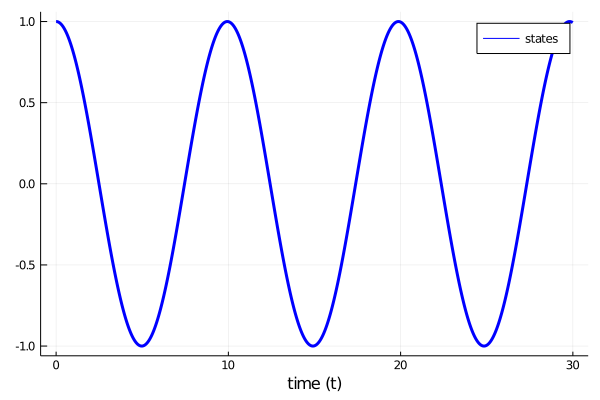

In [4]:
plot(TT, x, label="states", color="blue", linewidth=3,  xlabel="time (t)")

It's essentially a pure cosine signal.

### Damped harmonic oscillator

Now, we add friction. You can imagine that the spring loses energy in the form of heat. As it loses energy, the puck will oscillate less and start to settle into a particular position. This is called a damped harmonic oscillator and it has the following differential equation:

$$m \frac{d^2 x(t)}{dt^2} + c \frac{dx(t)}{dt} + k x(t) = 0$$

If you discretise with a backwards difference for the first derivative, i.e.:

$$\frac{d x(t)}{d t} = \frac{x(t) - x(t-\delta)}{\delta} , $$

you get

$$m \frac{x_{t+1} - 2x_{t} + x_{t-1}}{\delta^2} + c \frac{x_t - x_{t-1}}{\delta} + k x_t = 0 \, .$$

If you re-arrange that, you get:

$$\begin{align}
m \frac{x_{t+1} - 2x_{t} + x_{t-1}}{\delta^2} + c \frac{x_t - x_{t-1}}{\delta} + k x_t =&\ 0 \\
m (x_{t+1} - 2x_{t} + x_{t-1}) =&\ - c \delta (x_t - x_{t-1}) - k \delta^2 x_t \\
m x_{t+1} - 2 m x_{t} + m x_{t-1} =&\ - c \delta x_t + c \delta x_{t-1} - k \delta^2 x_t \\
m x_{t+1} =&\ + 2 m x_{t} - m x_{t-1} - c \delta x_t + c \delta x_{t-1} - k \delta^2 x_t \\
m x_{t+1} =&\ (2 m - c\delta - k \delta^2)x_{t} + (c \delta -m) x_{t-1} \\
x_{t+1} =&\ \frac{2 m - c\delta - k \delta^2}{m}x_{t} + \frac{c \delta -m}{m} x_{t-1} \\
\end{align}$$

Again, we fix parameters, pick an initial condition and start generating.

In [5]:
# Pick dynamical parameters
m = 2.
c = 0.4
k = 0.8

# Start state array
x = zeros(T,)

# Pick initial condition
x[1] = 1.
x[2] = 1.

# State transition function
damped_harmonic_oscillator(x_t, x_tmin1, m, c, k, δ) =  (2*m - c*δ - k*δ^2)/m*x_t + (c*δ - m)/m*x_tmin1

# Iterate
for t = 2:T-1
   x[t+1] = damped_harmonic_oscillator(x[t], x[t-1], m, c, k, δ) 
end

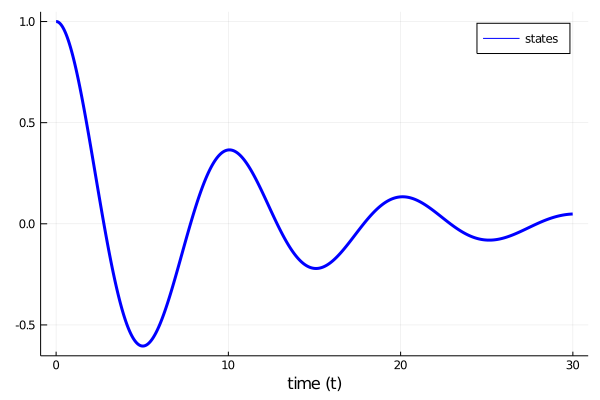

In [6]:
plot(TT, x, label="states", color="blue", linewidth=3,  xlabel="time (t)")

You can see that the puck oscillates less and less and starts to settle into the $0$ position.

### Driven damped harmonic oscillator

To be _driven_ means that there is an input signal that "pushes" the system. Imagine that the frame on which the spring hangs, is moving. These driving forces are usually in the form of vibrations as well. So, something like a cosine with an amplitude $A$ and frequency parameter $\omega$:

$$u(t) = A cos(\omega t) , .$$

The _driven_ damped harmonic oscillator has the following differential equation:

$$m \frac{d^2 x(t)}{dt^2} + c \frac{dx(t)}{dt} + k x(t) = u(t), $$

which, after discretisation, becomes:

$$m \frac{x_{t+1} - 2x_{t} + x_{t-1}}{\delta^2} + c \frac{x_t - x_{t-1}}{\delta} + k x_t = u_t \, .$$

If you re-arrange that, you get:

$$\begin{align}
m (x_{t+1} - 2x_{t} + x_{t-1}) =&\ - c \delta (x_t - x_{t-1} - k \delta^2 x_t + \delta^2 u_t \\
m x_{t+1} - 2 m x_{t} + m x_{t-1} =&\ - c \delta x_t + c \delta x_{t-1} - k \delta^2 x_t + \delta^2 u_t \\
m x_{t+1} =&\ + 2 m x_{t} - m x_{t-1} - c \delta x_t + c \delta x_{t-1} - k \delta^2 x_t + \delta^2 u_t \\
m x_{t+1} =&\ (2 m - c\delta - k \delta^2)x_{t} + (c \delta -m) x_{t-1} + \delta^2 u_t \\
x_{t+1} =&\ \frac{2 m - c\delta - k \delta^2}{m}x_{t} + \frac{c \delta -m}{m} x_{t-1} + \delta^2 u_t \\
\end{align}$$

Now, we must first generate an driving force, i.e. an input signal. Then we fix the parameters, pick an initial condition, and start generating.

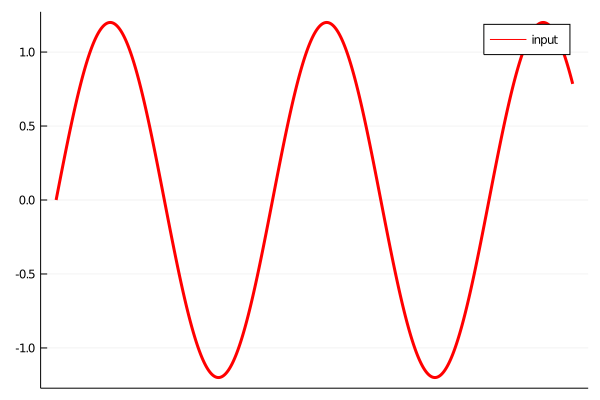

In [16]:
# Generate input signal
A = 1.2
ω = 0.5
u = A.*sin.(ω .*TT)

plot(TT, u, label="input", color="red", linewidth=3, xticks=:none)

In [8]:
# Pick dynamical parameters
m = 2.
c = 0.4
k = 0.8

# Start state array
x = zeros(T,)

# Pick initial condition
x[1] = 0.
x[2] = 0.

# State transition function
driven_damped_harmonic_oscillator(x_t, x_tmin1, m, c, k, δ, u_t) =  (2*m - c*δ - k*δ^2)/m*x_t + (c*δ - m)/m*x_tmin1 + δ^2*u_t

# Iterate
for t = 2:T-1
   x[t+1] = driven_damped_harmonic_oscillator(x[t], x[t-1], m, c, k, δ, u[t]) 
end

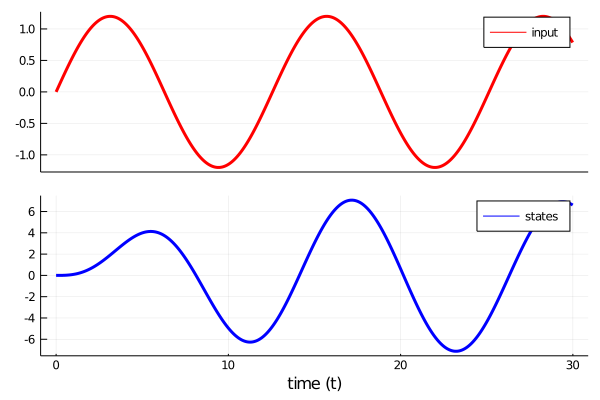

In [9]:
p11 = plot(TT, u, label="input", color="red", linewidth=3,  xticks=:none)
p12 = plot(TT, x, label="states", color="blue", linewidth=3,  xlabel="time (t)")
plot(p11, p12, layout=(2,1))

As you can see, the output doesn't decrease. Instead, the puck keeps oscillating in the frequency of the input signal (resonance).

### Duffing oscillator

The Duffing equation is essentially a driven damped harmonic oscillator, but with a nonlinearity added to the position of the object. You can imagine that there is a magnet close by the puck that either attracts or repels it (depending on the magnet's orientation). The Duffing oscillator has the following differential equation:

$$m \frac{d^2 x(t)}{dt^2} + c \frac{dx(t)}{dt} + a x(t) + bx(t)^3  = u(t), $$

which, after discretisation, becomes:

$$m \frac{x_{t+1} - 2x_{t} + x_{t-1}}{\delta^2} + c \frac{x_t - x_{t-1}}{\delta} + a x_t + b x_t^3= u_t \, .$$

So, there's an additional parameter now, $k$ has been replaced by $a$ (the _linear_ spring coefficient) and $b$ (the _nonlinear_ spring coefficient). If you re-arrange that, you get:

$$\begin{align}
m (x_{t+1} - 2x_{t} + x_{t-1}) =&\ - c \delta (x_t - x_{t-1} - \delta^2 a x_t - \delta^2 b x_t^3 + \delta^2 u_t \\
m x_{t+1} - 2 m x_{t} + m x_{t-1} =&\ - c \delta x_t + c \delta x_{t-1} - \delta^2 a x_t - \delta^2 b x_t^3 + \delta^2 u_t \\
m x_{t+1} =&\ + 2 m x_{t} - m x_{t-1} - c \delta x_t + c \delta x_{t-1} - \delta^2 a x_t - \delta^2 b x_t^3 + \delta^2 u_t \\
m x_{t+1} =&\ (2 m - c\delta - a \delta^2)x_{t} - \delta^2 b x_t^3 + (c \delta -m) x_{t-1} + \delta^2 u_t \\
x_{t+1} =&\ \frac{2 m - c\delta - k \delta^2}{m}x_{t} + \frac{- \delta^2 b}{m} x_t^3 + \frac{c \delta -m}{m} x_{t-1} + \delta^2 u_t \\
\end{align}$$

In [10]:
# Pick dynamical parameters
m = 2.
c = 0.4
a = 0.8
b = 3.0

# Start state array
x = zeros(T,)

# Pick initial condition
x[1] = 1.
x[2] = 1.

# State transition function
Duffing_oscillator(x_t, x_tmin1, m, c, a, b, δ, u_t) =  (2*m - c*δ - a*δ^2)/m*x_t + (-δ^2*b)/m*x_t^3 + (c*δ - m)/m*x_tmin1 + δ^2*u_t

# Iterate
for t = 2:T-1
   x[t+1] = Duffing_oscillator(x[t], x[t-1], m, c, a, b, δ, u[t]) 
end

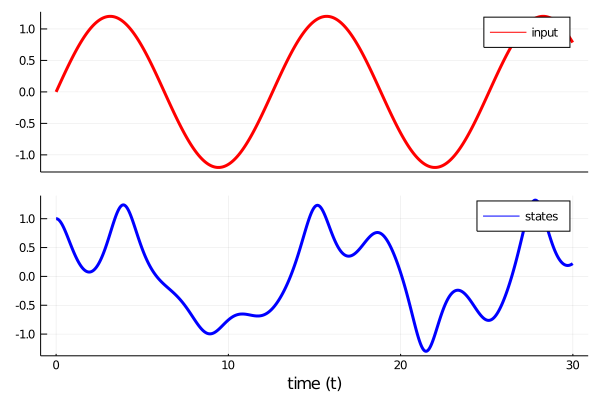

In [11]:
p11 = plot(TT, u, label="input", color="red", linewidth=3,  xticks=:none)
p12 = plot(TT, x, label="states", color="blue", linewidth=3,  xlabel="time (t)")
plot(p11, p12, layout=(2,1))

So, it shows some nonlinear behaviour, but essentially it still acts as a driven damped harmonic oscillator.

### Adding noise

With measurement noise, we get:

$$\begin{align}
x_{t+1} =&\ \frac{2 m - c\delta - k \delta^2}{m}x_{t} + \frac{- \delta^2 b}{m} x_t^3 + \frac{c \delta -m}{m} x_{t-1} + \delta^2 u_t \\
y_t =&\ x_t + e_t \, ,
\end{align}$$

where $e_t \sim \mathcal{N}(0, \tau^-1)$.

In [12]:
# Pick dynamical parameters
m = 2.
c = 0.4
a = 0.8
b = 3.0

# Start state array
x = zeros(T,)

# Pick initial condition
x[1] = 1.
x[2] = 1.

# State transition function
Duffing_oscillator(x_t, x_tmin1, m, c, a, b, δ, u_t) =  (2*m - c*δ - a*δ^2)/m*x_t + (-δ^2*b)/m*x_t^3 + (c*δ - m)/m*x_tmin1 + δ^2*u_t

# Iterate
for t = 2:T-1
   x[t+1] = Duffing_oscillator(x[t], x[t-1], m, c, a, b, δ, u[t]) 
end

# Noisy observations
y = x .+ randn(T,);

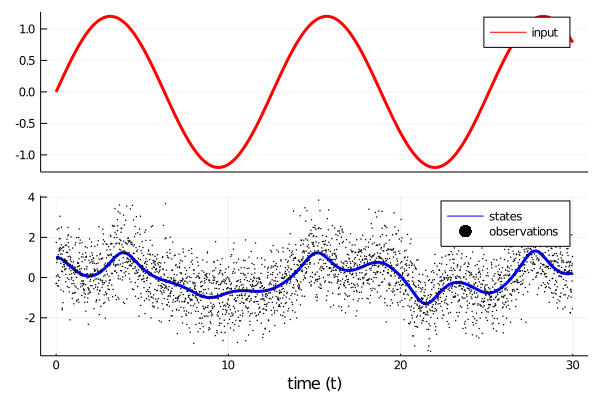

In [13]:
p11 = plot(TT, u, label="input", color="red", linewidth=3,  xticks=:none)
p12 = plot(TT, x, label="states", color="blue", linewidth=3,  xlabel="time (t)")
scatter!(TT, y, markersize=1, label="observations", color="black")
plot(p11, p12, layout=(2,1))

If you add process noise, then the output signal will not periodical.

In [14]:
# Pick dynamical parameters
m = 2.
c = 0.4
a = 0.8
b = 3.0
τ = 0.01

# Start state array
x = zeros(T,)

# Pick initial condition
x[1] = 1.
x[2] = 1.

# State transition function
Duffing_oscillator(x_t, x_tmin1, m, c, a, b, δ, u_t) =  (2*m - c*δ - a*δ^2)/m*x_t + (-δ^2*b)/m*x_t^3 + (c*δ - m)/m*x_tmin1 + δ^2*u_t + δ^2/τ*randn(1,)[1]

# Iterate
for t = 2:T-1
   x[t+1] = Duffing_oscillator(x[t], x[t-1], m, c, a, b, δ, u[t]) 
end

# Noisy observations
y = x .+ randn(T,);

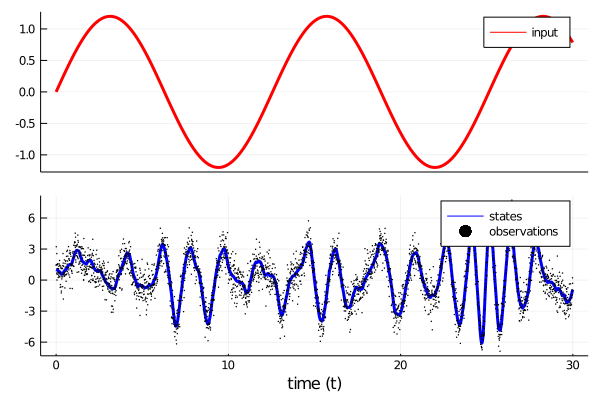

In [15]:
p11 = plot(TT, u, label="input", color="red", linewidth=3,  xticks=:none)
p12 = plot(TT, x, label="states", color="blue", linewidth=3,  xlabel="time (t)")
scatter!(TT, y, markersize=1, label="observations", color="black")
plot(p11, p12, layout=(2,1))